In [3]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio


In [4]:
ravdess="C:\\Users\\Sarvadnya\\audio_speech_actors_01-24"

In [5]:
ravdess_directory_list = os.listdir(ravdess)

emotion = []
path = []
for i in ravdess_directory_list:
    fname= os.listdir(ravdess +'\\' + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        path.append(ravdess + '\\' + i + '\\' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df.columns = ['emotion'] 
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)


In [6]:
RAV_df

emotion                                               path
0      neutral  C:\Users\Sarvadnya\audio_speech_actors_01-24\A...
1      neutral  C:\Users\Sarvadnya\audio_speech_actors_01-24\A...
2      neutral  C:\Users\Sarvadnya\audio_speech_actors_01-24\A...
3      neutral  C:\Users\Sarvadnya\audio_speech_actors_01-24\A...
4      neutral  C:\Users\Sarvadnya\audio_speech_actors_01-24\A...
...        ...                                                ...
1435  surprise  C:\Users\Sarvadnya\audio_speech_actors_01-24\A...
1436  surprise  C:\Users\Sarvadnya\audio_speech_actors_01-24\A...
1437  surprise  C:\Users\Sarvadnya\audio_speech_actors_01-24\A...
1438  surprise  C:\Users\Sarvadnya\audio_speech_actors_01-24\A...
1439  surprise  C:\Users\Sarvadnya\audio_speech_actors_01-24\A...

[1440 rows x 2 columns]

In [7]:
RAV_df['emotion'].value_counts()

emotion
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

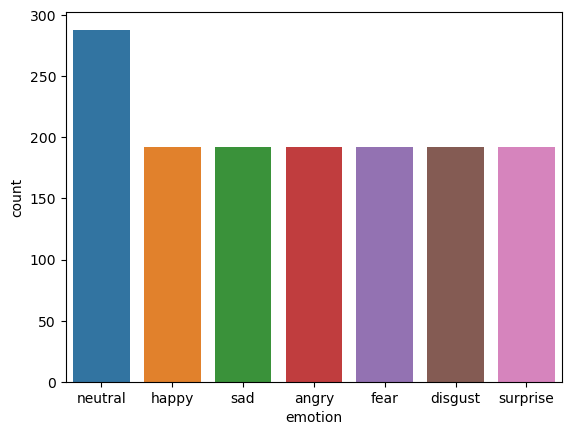

In [8]:
sns.countplot(data=RAV_df, x='emotion')

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

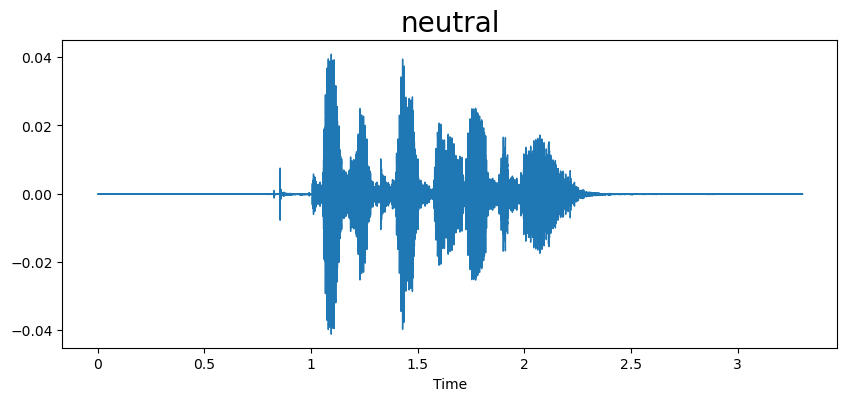

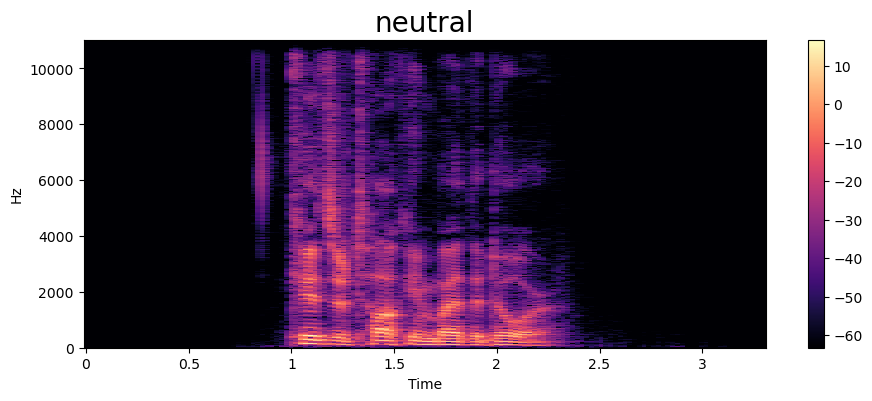

In [10]:
emotion = 'neutral'
path = np.array(RAV_df['path'][RAV_df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

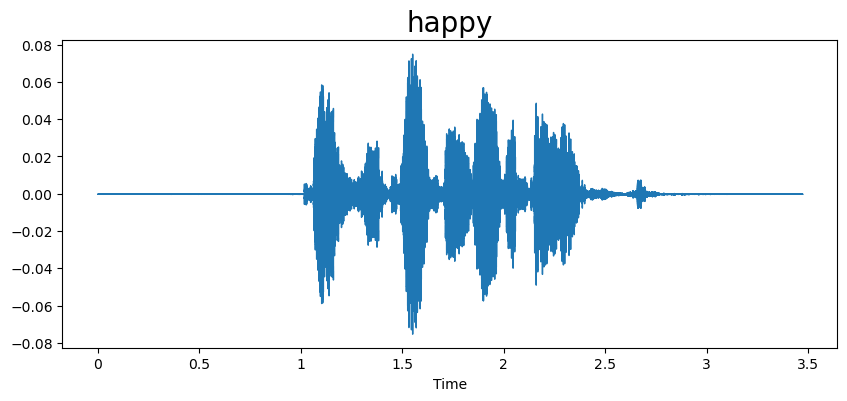

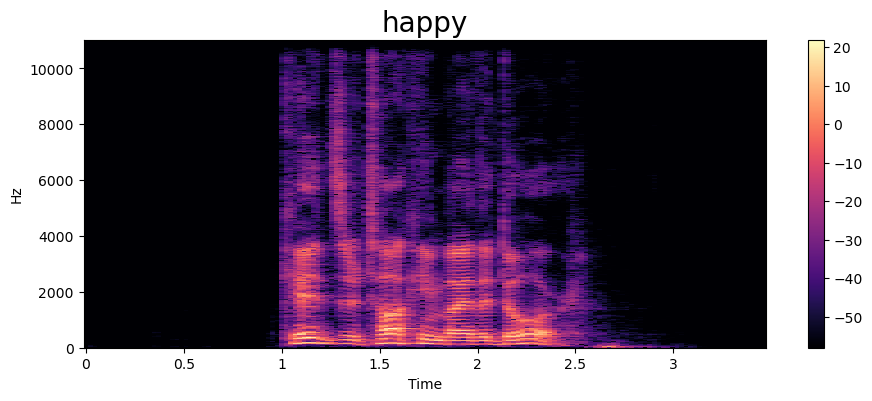

In [11]:
emotion = 'happy'
path = np.array(RAV_df['path'][RAV_df['emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

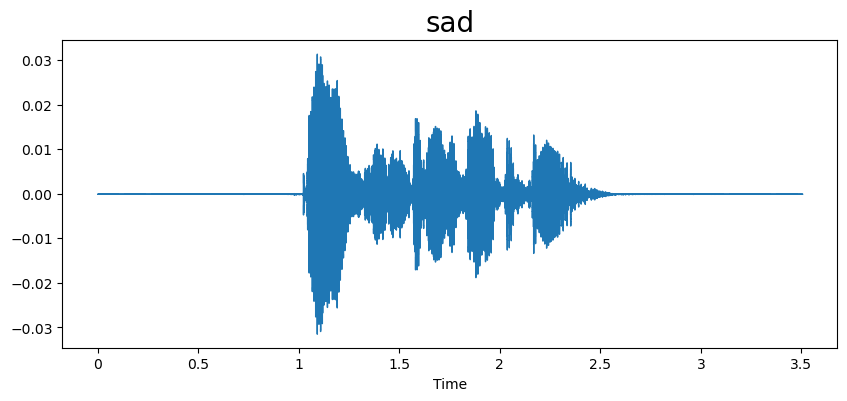

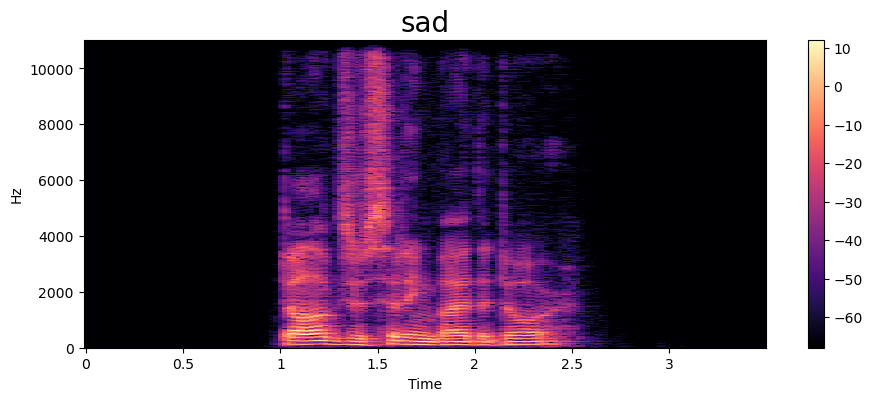

In [12]:
emotion = 'sad'
path = np.array(RAV_df['path'][RAV_df['emotion']==emotion])[2]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

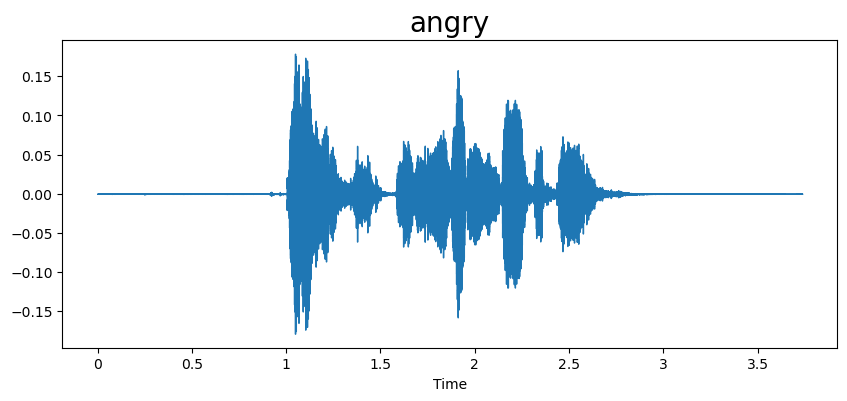

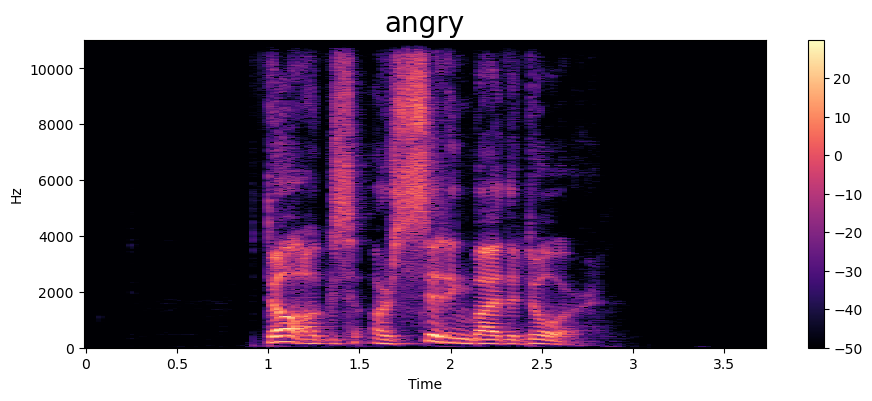

In [13]:
emotion = 'angry'
path = np.array(RAV_df['path'][RAV_df['emotion']==emotion])[3]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

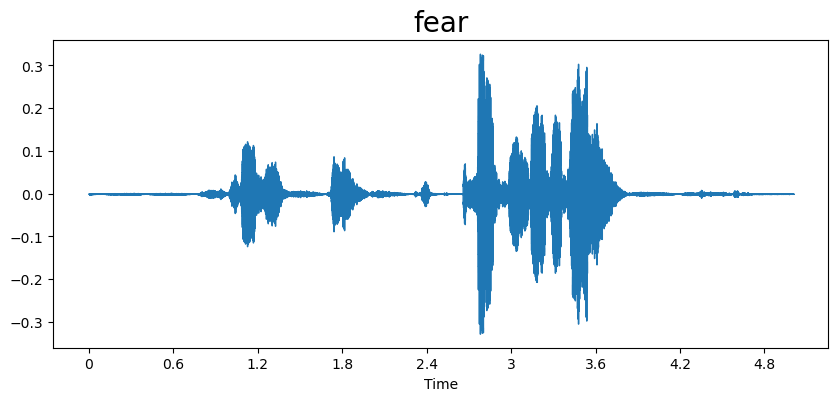

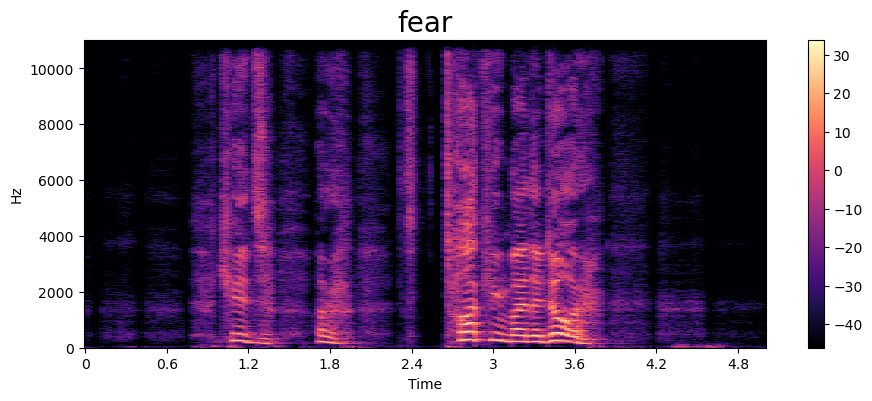

In [14]:
emotion = 'fear'
path = np.array(RAV_df['path'][RAV_df['emotion']==emotion])[4]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

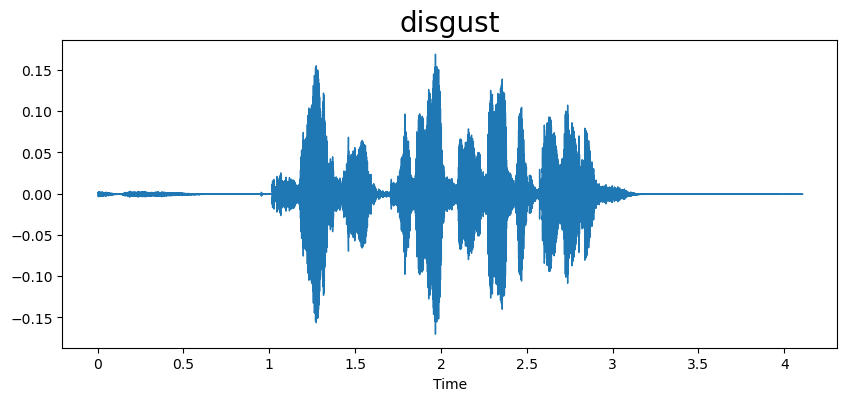

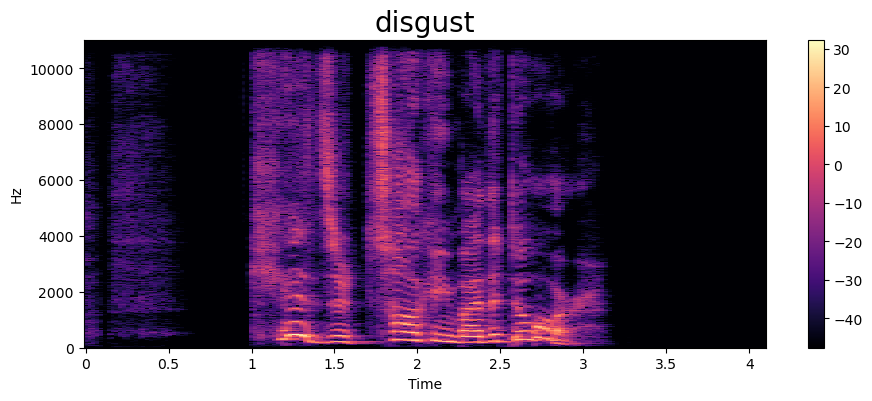

In [15]:
emotion = 'disgust'
path = np.array(RAV_df['path'][RAV_df['emotion']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

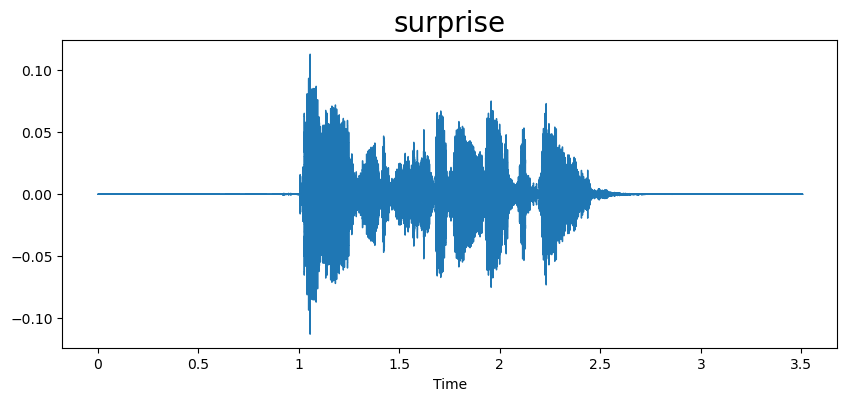

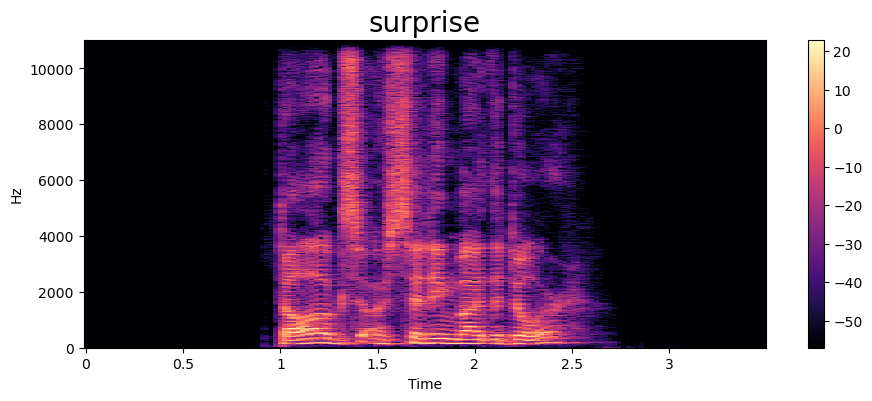

In [16]:
emotion = 'surprise'
path = np.array(RAV_df['path'][RAV_df['emotion']==emotion])[6]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [17]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
def pitch(data,sr):
    return librosa.effects.pitch_shift(data,sr)

In [18]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    

    return audio

In [19]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(RAV_df.path,RAV_df.emotion,range(RAV_df.path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start) 

3it [00:00,  8.15it/s]

0 audio has been processed


502it [00:43, 11.94it/s]

500 audio has been processed


1002it [01:26, 11.00it/s]

1000 audio has been processed


1440it [02:01, 11.90it/s]

Done
Time:  121.01503790006973


In [20]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

0         1         2         3         4         5         6  \
0  0.173828  0.264648  0.372559  0.486328  0.625488  0.681152  0.720703   
1  0.248535  0.373047  0.498535  0.491211  0.510742  0.513184  0.507324   
2  0.247070  0.389648  0.564941  0.642578  0.665527  0.684570  0.676270   
3  0.250977  0.372559  0.498535  0.493652  0.501465  0.511230  0.515137   
4  0.183105  0.376953  0.551270  0.642090  0.800781  0.777832  0.801270   

          7         8         9  ...      2367      2368      2369      2370  \
0  0.651855  0.562988  0.559082  ...  0.766315  0.755441  0.743671  0.731043   
1  0.505371  0.486328  0.482910  ... -4.546493 -3.771454  0.641852  3.487586   
2  0.666992  0.648926  0.595703  ...  0.000000  0.000000  0.000000  0.000000   
3  0.511230  0.491699  0.481934  ...  2.100687 -0.897567 -5.151789 -1.552156   
4  0.789551  0.794922  0.850098  ...  0.000000  0.000000  0.000000  0.000000   

       2371      2372      2373      2374      2375  Emotions  
0  0.717561  0.703260  0.688124  0.672208  0.655518   neutral  
1  0.569006 -1.847549 -0.127783  3.497847  1.439668   neutral  
2  0.000000  0.000000  0.000000  0.000000  0.000000   neutral  
3 -1.297491  0.350137 -0.415398  0.229315  1.022712   neutral  
4  0.000000  0.000000  0.000000  0.000000  0.000000   neutral  

[5 rows x 2377 columns]

In [21]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(2880, 2377)

In [22]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [24]:
print(Y.shape)
print(X.shape)

(2880, 7)
(2880, 2376)


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2304, 2376), (2304, 7), (576, 2376), (576, 7))

In [26]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((2304, 2376, 1), (2304, 7), (576, 2376, 1), (576, 7))

In [27]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
#from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [30]:
#pip uninstall keras


In [31]:
#pip install keras

In [30]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.layers import Dropout  # Import Dropout layer explicitly

model = tf.keras.Sequential([
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),

    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.2),  # Use Dropout layer explicitly
    
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),

    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.2),  # Use Dropout layer explicitly

    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.2),  # Use Dropout layer explicitly

    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    L.Dense(7, activation='softmax')
])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\Sarvadnya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2376, 512)           │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2376, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1188, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1188, 512)           │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1188, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 594, 256)            │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 594, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 297, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 297, 256)            │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 297, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 149, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 149, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9600)                │              

 Total params: 7,193,223 (27.44 MB)

 Trainable params: 7,188,871 (27.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [31]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=100)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 988s 41s/step - accuracy: 0.3222 - loss: 2.5198 - val_accuracy: 0.1632 - val_loss: 151.7880
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 978s 41s/step - accuracy: 0.4808 - loss: 1.3948 - val_accuracy: 0.1389 - val_loss: 23.2855
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 846s 35s/step - accuracy: 0.5144 - loss: 1.2849 - val_accuracy: 0.1163 - val_loss: 15.5710
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 826s 34s/step - accuracy: 0.5376 - loss: 1.2315 - val_accuracy: 0.2691 - val_loss: 5.6420
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 872s 35s/step - accuracy: 0.5627 - loss: 1.1370 - val_accuracy: 0.2222 - val_loss: 5.6416
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 835s 35s/step - accuracy: 0.6321 - loss: 1.0078 - val_accuracy: 0.2326 - val_loss: 2.7901
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 834s 35s/step - accuracy: 0.5982 - loss: 1.0665 - val_accuracy: 0.4062 - val_loss: 2.3065
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 844s 35s/step - accuracy: 0.6729 - loss: 0.9035 - val_accuracy

In [32]:
# Assuming 'model' is your trained model
model.save('trained_model.h5')


In [32]:
from keras.models import load_model

# Load the model
model = load_model('trained_model.h5')


In [34]:
import os

model_file = 'trained_model.h5'

if os.path.exists(model_file):
    print("The model has been saved.")
else:
    print("The model has not been saved.")


The model has been saved.


In [33]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5360 - loss: 1.9327
Accuracy of our model on test data :  53.29861044883728 %


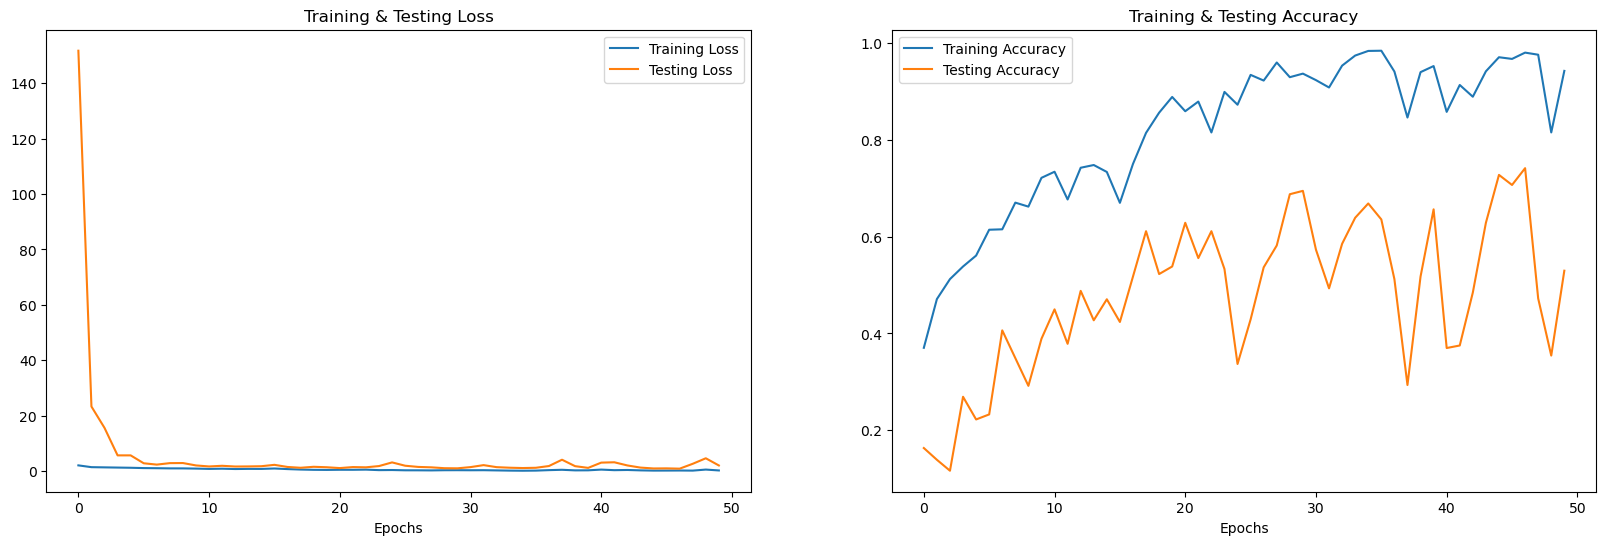

In [36]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [35]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0

18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step


Predicted Labels Actual Labels
0           surprise      surprise
1            neutral       neutral
2            disgust       disgust
3                sad           sad
4                sad       neutral
..               ...           ...
571         surprise       disgust
572          neutral      surprise
573            angry         angry
574          neutral           sad
575          neutral       neutral

[576 rows x 2 columns]

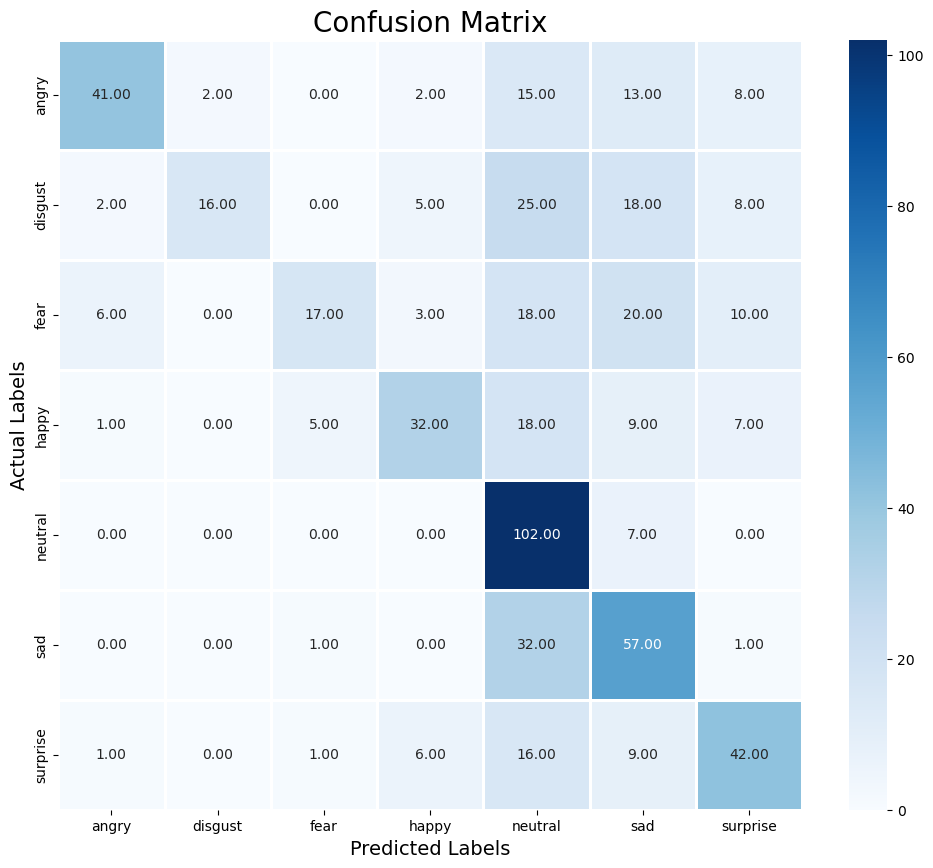

              precision    recall  f1-score   support

       angry       0.80      0.51      0.62        81
     disgust       0.89      0.22      0.35        74
        fear       0.71      0.23      0.35        74
       happy       0.67      0.44      0.53        72
     neutral       0.45      0.94      0.61       109
         sad       0.43      0.63      0.51        91
    surprise       0.55      0.56      0.56        75

    accuracy                           0.53       576
   macro avg       0.64      0.50      0.50       576
weighted avg       0.63      0.53      0.51       576



In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))